## This notebook generates Figures 5A and 5B in the paper. It plots the binned distribution of the diffBUM-HMM, deltaSHAPE and dStruct analyses.

In [1]:
! pip install pandas numpy matplotlib

In [2]:
import os
import sys
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['axes.formatter.useoffset'] = False

%matplotlib inline

In [3]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

### Loading the data:

In [4]:
alldata  = pd.read_csv('../../../Data/New_data_table_Xist.txt',sep="\t",header=0,index_col=0)

### Masking positions with no coverage:

In [5]:
positionstomask = alldata[(alldata["SHAPE_reactivity_ex_vivo_1"] < -900) | 
                          (alldata["SHAPE_reactivity_ex_vivo_2"] < -900) |
                          (alldata["SHAPE_reactivity_in_cell_1"] < -900) | 
                          (alldata["SHAPE_reactivity_in_cell_2"] < -900)].index
len(positionstomask)

2517

In [6]:
alldata.columns[11:]

Index(['deltaSHAPE_rep1', 'deltaSHAPE_rep2', 'dStruct', 'dStruct_scaled',
       'unmodified', 'ex_vivo', 'in_vivo', 'both', 'scaled_unmodified',
       'scaled_ex_vivo', 'scaled_in_vivo', 'scaled_both', 'base_paired_to'],
      dtype='object')

In [7]:
alldata.loc[positionstomask,alldata.columns[11:]] = np.nan

### Count number of DRNs in diffBUM_HMM data:

In [8]:
threshold = 0.95

ex_vivo = len(alldata[alldata.ex_vivo >= threshold].index)
in_vivo = len(alldata[alldata.in_vivo >= threshold].index)
ex_vivo_scaled = len(alldata[alldata.scaled_ex_vivo >= threshold].index)
in_vivo_scaled = len(alldata[alldata.scaled_in_vivo >= threshold].index)

print("ex_vivo:\t%s\nin_vivo:\t%s\nex_vivo_scaled:\t%s\nin_vivo_scaled:\t%s" % \
      (ex_vivo,in_vivo,ex_vivo_scaled,in_vivo_scaled))

ex_vivo:	1161
in_vivo:	142
ex_vivo_scaled:	1739
in_vivo_scaled:	188


### Same but in delta_SHAPE

In [9]:
ex_vivo_1 = len(alldata[alldata.deltaSHAPE_rep1 > 0].index)
ex_vivo_2 = len(alldata[alldata.deltaSHAPE_rep2 > 0].index)
in_vivo_1 = len(alldata[alldata.deltaSHAPE_rep1 < 0].index)
in_vivo_2 = len(alldata[alldata.deltaSHAPE_rep2 < 0].index)

print("sample\trep1\trep2")
print("dSHAPE_ex_vivo %s\t%s" % (ex_vivo_1,ex_vivo_2))
print("dSHAPE_in_vivo %s\t%s" % (in_vivo_1,in_vivo_2))

sample	rep1	rep2
dSHAPE_ex_vivo 460	510
dSHAPE_in_vivo 337	428


### This is the same as found in the original files so everything was added to the table correctly.

In [10]:
alldata.columns

Index(['nucleotide', 'CELF1', 'FUS', 'HuR', 'PTBP1', 'RBFOX2', 'TARDBP',
       'SHAPE_reactivity_ex_vivo_1', 'SHAPE_reactivity_ex_vivo_2',
       'SHAPE_reactivity_in_cell_1', 'SHAPE_reactivity_in_cell_2',
       'deltaSHAPE_rep1', 'deltaSHAPE_rep2', 'dStruct', 'dStruct_scaled',
       'unmodified', 'ex_vivo', 'in_vivo', 'both', 'scaled_unmodified',
       'scaled_ex_vivo', 'scaled_in_vivo', 'scaled_both', 'base_paired_to'],
      dtype='object')

### Making the plot:

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:51: UserWarning: Legend does not support 1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
17914   NaN
17915   NaN
17916   NaN
17917   NaN
17918   NaN
Name: deltaSHAPE_rep1, Length: 17918, dtype: float64 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in less
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in less
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:147: RuntimeWarning: invalid

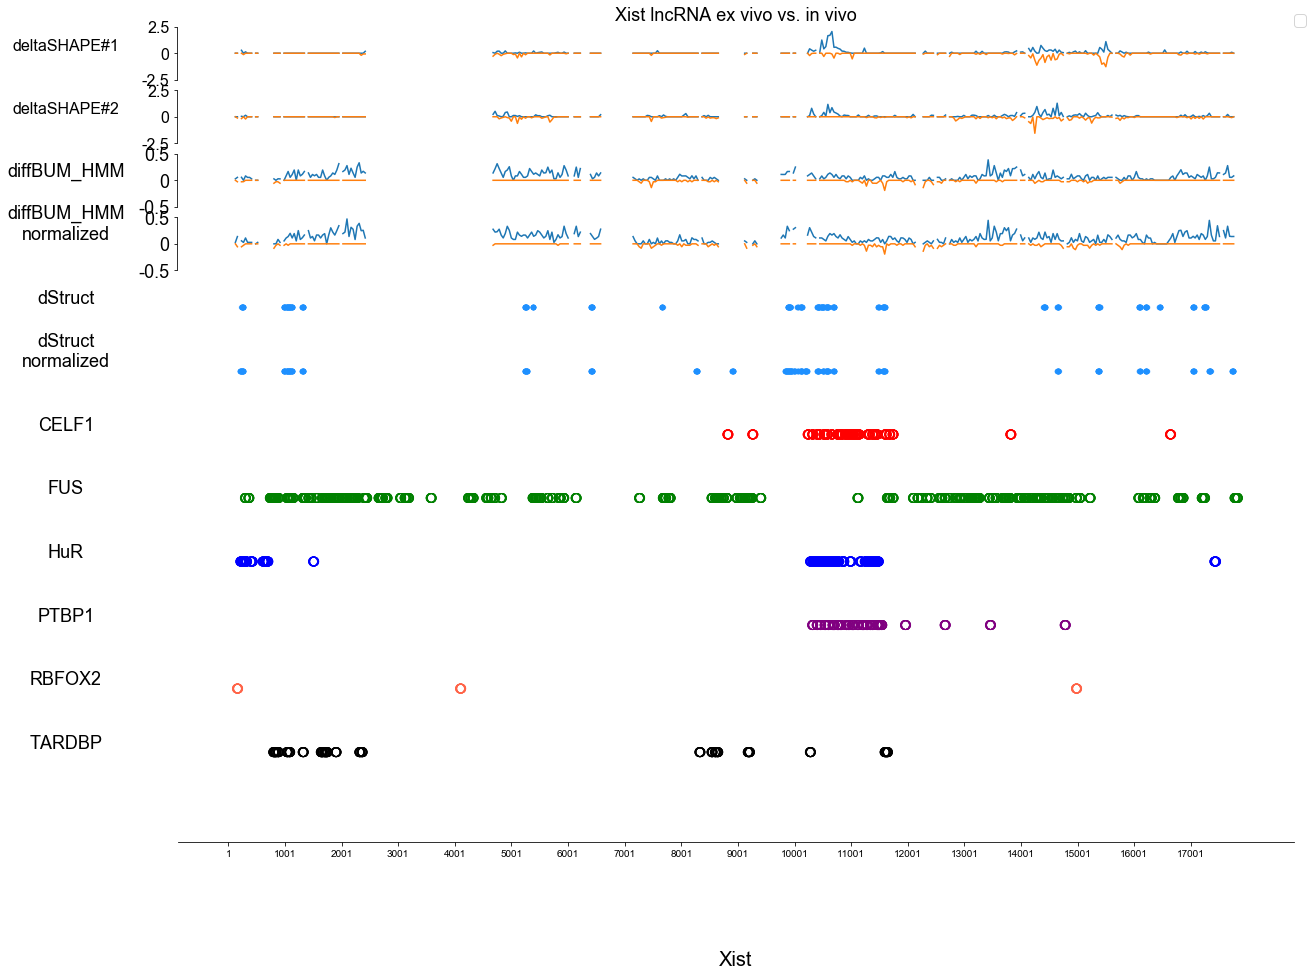

In [11]:
count = 0
numberofplots = 13
threshold = 0.95
nbins = 500

fig,ax = plt.subplots(numberofplots,figsize=[20,15],sharex=True)

nucleotides = alldata.index
nucleotides = np.squeeze(nucleotides)

### plotting deltaSHAPE rep 1

exvivo = copy.deepcopy(alldata.deltaSHAPE_rep1)
invivo = copy.deepcopy(alldata.deltaSHAPE_rep1)

exvivo[exvivo < 0] = 0 
invivo[invivo > 0] = 0 

exvivo = np.squeeze(exvivo)
invivo = np.squeeze(invivo)

n, _ = np.histogram(nucleotides,bins=nbins)
sy, _ = np.histogram(nucleotides,bins=nbins,weights=exvivo)
sy2, _ = np.histogram(nucleotides,bins=nbins,weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides,bins=nbins)
sy, _ = np.histogram(nucleotides,bins=nbins,weights=invivo)
sy2, _ = np.histogram(nucleotides,bins=nbins,weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

xticks = list(np.arange(1,len(alldata.index),1000))

ymin = -2.5
ymax = 2.5
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'deltaSHAPE#1',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
ax[count].legend((exvivo,invivo), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### plotting deltaSHAPE rep 2

exvivo = copy.deepcopy(alldata.deltaSHAPE_rep2)
invivo = copy.deepcopy(alldata.deltaSHAPE_rep2)

exvivo[exvivo < 0] = 0 
invivo[invivo > 0] = 0 

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

n, _ = np.histogram(nucleotides,bins=nbins)
sy, _ = np.histogram(nucleotides,bins=nbins,weights=exvivo)
sy2, _ = np.histogram(nucleotides,bins=nbins,weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides,bins=nbins)
sy, _ = np.histogram(nucleotides,bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides,bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

xticks = list(np.arange(1,len(alldata.index),1000))

ymin = -2.5
ymax = 2.5
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'deltaSHAPE#2',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### plotting diffBUM_HMM not normalized:

exvivo = alldata.ex_vivo.values
invivo = alldata.in_vivo.values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1

### plotting diffBUM_HMM normalized:

exvivo = alldata.scaled_ex_vivo.values
invivo = alldata.scaled_in_vivo.values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM\nnormalized',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

### plotting the dStruct data:

count += 1
selection = alldata[alldata.dStruct > 0]
x = selection.index
y = selection.dStruct.values

ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue', alpha=0.5)
formatAxes(ax[count],ylabel='dStruct',text_size=18)

count += 1
selection = alldata[alldata.dStruct_scaled > 0]
x = selection.index
y = selection.dStruct_scaled.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue', alpha=0.5)

formatAxes(ax[count],\
           ylabel = 'dStruct\nnormalized',\
           text_size = 18,\
           xticks = [1,17000],\
           xticklabels = [1,17000],\
           xlabel = "Xist")

ax[count].tick_params(axis='x',which='major',pad=150)

### plotting the protein data;

count += 1
name = 'CELF1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].set_yticks([1])
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='r', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'FUS'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='green', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'HuR'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='blue', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'PTBP1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='purple', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'RBFOX2'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='tomato', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'TARDBP'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='black', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
x = alldata.index
y = alldata[name]
ax[count].set_xticks(np.arange(alldata.index[0],alldata.index[-1],1000))
ax[count].set_xticklabels(np.arange(alldata.index[0],alldata.index[-1],1000))
ax[count].set_yticks([])

# Only show the bottom spine
ax[count].spines['right'].set_visible(False)
ax[count].spines['left'].set_visible(False)
ax[count].spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax[count].xaxis.set_ticks_position('bottom')
ax[count].scatter(x,y,s=0)

#fig.align_ylabels()
output_filename = "Figures_5A_and_5B_%s.pdf" % threshold
fig.savefig(output_filename,dpi=300)